In [1]:
# Library imports 

import pandas as pd
from datetime import datetime 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Load csv file 

df = pd.read_csv("company_financials.csv")
df.head()

,date,day_of_week,sales,direct_costs,overheads
0,2024-02-05,Monday,1500,800,300
1,2024-02-06,Tuesday,1200,700,280
2,2024-02-07,Wednesday,1100,350,320
3,2024-02-08,Thursday,1300,1050,350
4,2024-02-09,Friday,2000,1200,380


In [3]:
# info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          19 non-null     object
 1   day_of_week   19 non-null     object
 2   sales         19 non-null     int64 
 3   direct_costs  19 non-null     int64 
 4   overheads     19 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 892.0+ bytes


This dataset has 19 rows and 4 columns. We do not have any missing values. The data types of the columns are int64 and object. Let's start tackling the questions.

# 1. Compare the sales of the first seven days (week one) to the sales of the next seven days (week two). Use a bar graph to visualize the comparison.

In [4]:
# Converting the date column to datetime object

df["date"] = df["date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

In [5]:
# Adding a week column to the Dataframe

df["number_week"] = df["date"].dt.isocalendar().week
df

,date,day_of_week,sales,direct_costs,overheads,number_week
0,2024-02-05,Monday,1500,800,300,6
1,2024-02-06,Tuesday,1200,700,280,6
2,2024-02-07,Wednesday,1100,350,320,6
3,2024-02-08,Thursday,1300,1050,350,6
4,2024-02-09,Friday,2000,1200,380,6
5,2024-02-10,Saturday,1200,900,300,6
6,2024-02-11,Sunday,1200,600,250,6
7,2024-02-12,Monday,1400,850,310,7
8,2024-02-13,Tuesday,1300,750,290,7
9,2024-02-14,Wednesday,1900,1000,330,7


**You can see above that a column, "number_week," has been added to the DataFrame. The numbers in the columns 6, 7, and 8 represent ISO week numbers. Since we want the first and second weeks of the data, we are going to use the values 6 and 7 as numbers for weeks one and two, respectively.**

In [6]:
# Calculating weekly sales 

week_sales_1 = df[df["number_week"]==6]["sales"].sum()
week_sales_2 = df[df["number_week"]==7]["sales"].sum()

print(f"Week 1 sales: ${week_sales_1}")
print(f"Week 2 sales: ${week_sales_2}")

Week 1 sales: $9500
Week 2 sales: $12700


We are going to use Matplotlib to create the plot.

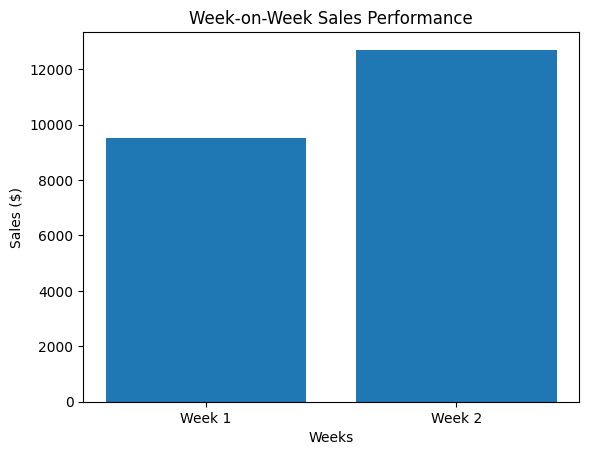

In [7]:
plt.bar(["Week 1", "Week 2"], [week_sales_1, week_sales_2])
plt.xlabel("Weeks")
plt.ylabel("Sales ($)")
plt.title("Week-on-Week Sales Performance")
plt.show()

**We can see that we had more sales in week 2 than week 1.**

# 2. What percentage of total costs do direct costs represent on average? What is the mean cost variation change between the minimum cost and the maximum cost as a percentage of total costs?

We will calculate total costs by adding the **"direct_costs"** column to the **"overheads"** column. We are going to divide the **"direct_costs"** by **"total_costs."** and use the **mean( )** method to calculate the percentage average.

In [8]:
# Calculating the total costs

total_costs = df["direct_costs"] + df["overheads"]

# Calculating the porcentage of direct cost to total costs

total_costs_pct = ((df["direct_costs"]/total_costs)*100).mean()

print(f"The percentage of directs cost to total costs {total_costs_pct: .2f}%")

The percentage of directs cost to total costs  73.12%


We will calculate cost variation by finding the difference between the maximum and minimum values in total_costs, dividing it by the mean() of the total_costs, and then multiplying by 100 to convert it to a percentage.

In [9]:
#  Calculating cost variation

cost_variation = (total_costs.max() - total_costs.min())/total_costs.mean() * 100
print(f"The mean cost variation:{cost_variation: .2f}%")

The mean cost variation: 82.92%


# 3. What is the difference between profit values for Fridays and Mondays? Visualize the difference using the bar chart. Visualize the daily profitability trend over time (whole period) using a line plot (use the date column).

Here we are going to filter the DataFrame using the **"day_of_week"** column to get profits for Mondays and Fridays. We will calculate the total profit for Mondays and the total profit for Fridays. We will use the values to calculate the difference and plot the bar chart:

The difference in profit between Fridays and Mondays is $1250


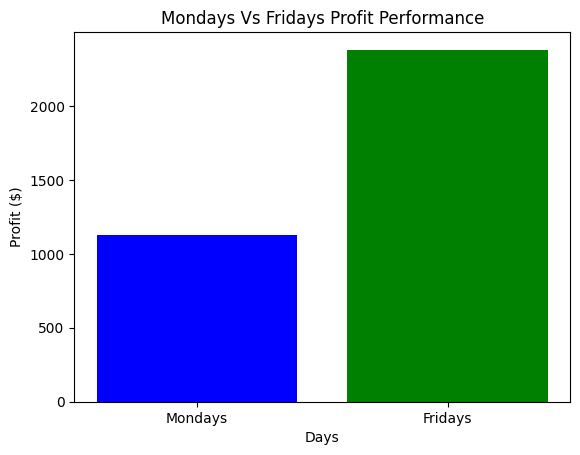

In [10]:
# Adding the profit column

df["profit"] = df["sales"] - df["direct_costs"] - df["overheads"]

# Calculating profif for Mondays
monday_profit = df[df["day_of_week"]=="Monday"]["profit"].sum()

# Calculating profit for Frydays
friday_profit = df[df["day_of_week"]=="Friday"]["profit"].sum()

# Calculating profit difference 

difference_profit = friday_profit - monday_profit
print(f"The difference in profit between Fridays and Mondays is ${difference_profit}")


# Plotting the data

plt.bar(["Mondays", "Fridays"], [monday_profit, friday_profit], color=["blue", "green"])
plt.xlabel("Days")
plt.ylabel("Profit ($)")
plt.title("Mondays Vs Fridays Profit Performance")
plt.show()



**We can clearly see that we have more money coming in at the end of the week than at the beginning of the week.**

The second part of the question wants us to visualize the daily profitability using the line graph. Here is the code and graph below: 

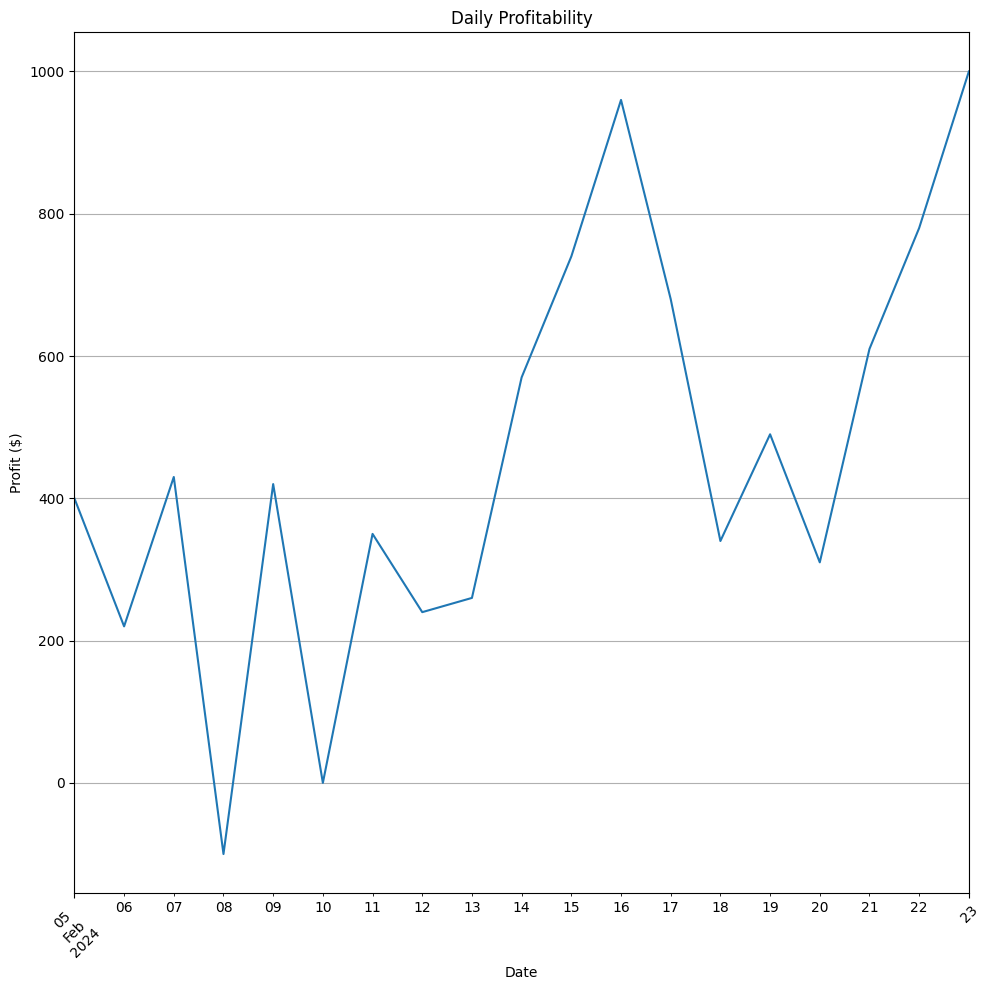

In [12]:
# Visualizing daily profitability 

df.set_index("date")["profit"].plot(figsize=(10,10))
plt.title("Daily Profitability")
plt.xlabel("Date")
plt.ylabel("Profit ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**Overall, the profitability trend is upward.**

# 4. What are the correlations between sales, direct costs, and overheads? Use a heatmap to visualize the correlations.

To calculate the correlations, we are going to use the pandas **corr()** method. We will use this method on the "sales," "direct_costs," and "overheads" columns. Correlation values range between 1 and -1. A coefficient close to 1 indicates a strong positive correlation (as one variable increases, the other tends to increase as well). A coefficient close to -1 indicates a strong negative correlation (as one variable increases, the other tends to decrease). A coefficient close to 0 indicates little to no linear correlation between the variables.

In [13]:
# Calculating correlation matrix 

correlation_matrix = df[["sales", "direct_costs", "overheads"]].corr()
correlation_matrix

,sales,direct_costs,overheads
sales,1.000000,0.858343,0.836533
direct_costs,0.858343,1.000000,0.822134
overheads,0.836533,0.822134,1.000000


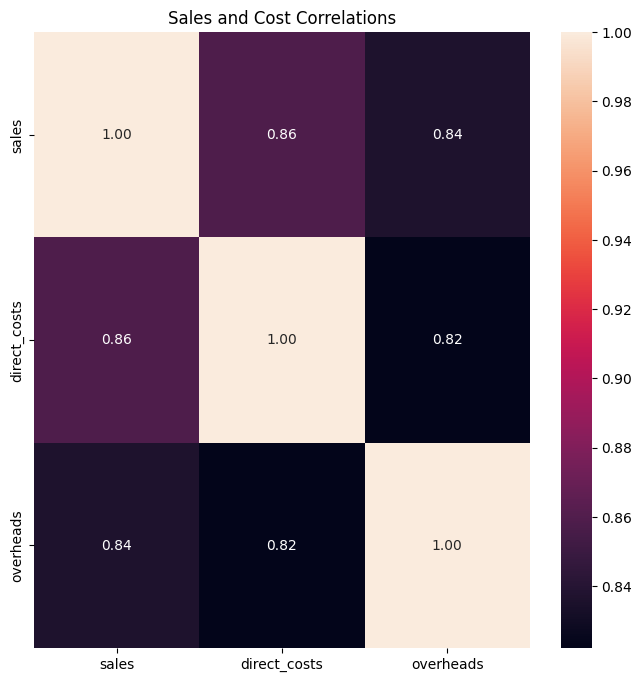

In [15]:
# Plotting heatmap 

plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Sales and Cost Correlations")
plt.show()

**We can clearly see that there is a strong correlation between Sales and Direct cost which means that as one variable increases, the other tends to increase as well.**